# <center> Lord of the Machines - Data Science Hackathon

<b>Problem Statement</b><br>
Email Marketing is still the most successful marketing channel and the essential element of any digital marketing strategy. Marketers spend a lot of time in writing that perfect email, labouring over each word, catchy layouts on multiple devices to get them best in-industry open rates & click rates.

How can I build my campaign to increase the click-through rates of email? - a question that is often heard when marketers are creating their email marketing plans.

Can we optimize our email marketing campaigns with Data Science?

It's time to unlock marketing potential and build some exceptional data-science products for email marketing.

Analytics Vidhya sends out marketing emailers for various events such as conferences, hackathons, etc. We have provided a sample of user-email interaction data from July 2017 to December 2017. You are required to predict the click probability of links inside a mailer for email campaigns from January 2018 to March 2018.

<b>EVALUATION METRIC</b><br>
The evaluation metric for this competition is AUC-ROC score.

https://datahack.analyticsvidhya.com/contest/lord-of-the-machines/?utm_source=sendinblue&utm_campaign=Lord_Of_The_Machines__Go_live&utm_medium=email

In [61]:
#Import basic necessary datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #To print multiple outputs
InteractiveShell.ast_node_interactivity = 'all'

We are provided with 3 datasets:
1. Campaign details of AV
2. Train dataset which shows the information whether user opened/clicked links in the campaign mail or not
3. Test dataset - to submit with click predictions

In [62]:
#Read the datasets provided and view the data
campaign = pd.read_csv('campaign_data.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
campaign.shape
campaign.head()
train.shape
train.head()
test.shape
test.head()
sample.shape
sample.head()

(52, 9)

,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,29,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...
1,30,Upcoming Events,18,14,7,1,"Dear AVians,\r\n \r\nAre your eager to know wh...",[July] Data Science Expert Meetups & Competiti...,http://r.newsletters.analyticsvidhya.com/7up0e...
2,31,Conference,15,13,5,1,Early Bird Pricing Till August 07  Save upto ...,Last chance to convince your boss before the E...,http://r.newsletters.analyticsvidhya.com/7usym...
3,32,Conference,24,19,7,1,\r\n \r\nHi ?\r\n \r\nBefore I dive into why y...,A.I. & Machine Learning: 5 reasons why you sho...,http://r.newsletters.analyticsvidhya.com/7uthl...
4,33,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...


(1023191, 6)

,id,user_id,campaign_id,send_date,is_open,is_click
0,42_14051,14051,42,01-09-2017 19:55,0,0
1,52_134438,134438,52,02-11-2017 12:53,0,0
2,33_181789,181789,33,24-07-2017 15:15,0,0
3,44_231448,231448,44,05-09-2017 11:36,0,0
4,29_185580,185580,29,01-07-2017 18:01,0,0


(773858, 4)

,id,campaign_id,user_id,send_date
0,63_122715,63,122715,01-02-2018 22:35
1,56_76206,56,76206,02-01-2018 08:15
2,57_96189,57,96189,05-01-2018 18:25
3,56_166917,56,166917,02-01-2018 08:15
4,56_172838,56,172838,02-01-2018 08:12


(773858, 2)

,id,is_click
0,63_122715,0
1,56_76206,1
2,57_96189,1
3,56_166917,1
4,56_172838,1


In [3]:
#Merge train and test datasets with campaign dataset on 'campaign_id' feature
train_merged = pd.merge(train, campaign, on='campaign_id', how='left').reset_index(drop=True)
test_merged = pd.merge(test, campaign, on='campaign_id', how='left').reset_index(drop=True)
train_merged.shape
test_merged.shape
train_merged.head()

(1023191, 14)

(773858, 12)

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url
0,42_14051,14051,42,01-09-2017 19:55,0,0,Newsletter,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...
1,52_134438,134438,52,02-11-2017 12:53,0,0,Newsletter,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...
2,33_181789,181789,33,24-07-2017 15:15,0,0,Others,7,3,1,1,Fireside Chat with DJ Patil - the master is he...,"[Delhi NCR] Fireside Chat with DJ Patil, Forme...",http://r.newsletters.analyticsvidhya.com/7uvlg...
3,44_231448,231448,44,05-09-2017 11:36,0,0,Upcoming Events,60,56,19,6,"[September Events]\r\n \r\nDear AVians,\r\n \r...","[September] Data Science Hackathons, Meetups a...",http://r.newsletters.analyticsvidhya.com/7veam...
4,29_185580,185580,29,01-07-2017 18:01,0,0,Newsletter,67,61,12,3,"Dear AVians,\r\n \r\nWe are shaping up a super...",Sneak Peek: A look at the emerging data scienc...,http://r.newsletters.analyticsvidhya.com/7um44...


In [5]:
#Check datatypes of the features in train data
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023191 entries, 0 to 1023190
Data columns (total 14 columns):
id                      1023191 non-null object
user_id                 1023191 non-null int64
campaign_id             1023191 non-null int64
send_date               1023191 non-null object
is_open                 1023191 non-null int64
is_click                1023191 non-null int64
communication_type      1023191 non-null object
total_links             1023191 non-null int64
no_of_internal_links    1023191 non-null int64
no_of_images            1023191 non-null int64
no_of_sections          1023191 non-null int64
email_body              1023191 non-null object
subject                 1023191 non-null object
email_url               1023191 non-null object
dtypes: int64(8), object(6)
memory usage: 109.3+ MB


In [6]:
#The feature 'send_date' is of type object which needs to be converted into datetime
train_merged.send_date = pd.to_datetime(train_merged.send_date)
test_merged.send_date = pd.to_datetime(test_merged.send_date)

In [8]:
#Check unique communication types in train and test datasets
train_merged.communication_type.unique()
test_merged.communication_type.unique()

array(['Newsletter', 'Others', 'Upcoming Events', 'Conference',
       'Corporate', 'Hackathon', 'Webinar'], dtype=object)

array(['Newsletter', 'Upcoming Events', 'Hackathon', 'Corporate'],
      dtype=object)

Note that communication types such as Others, Conference, Webinar are not present in test dataset

In [9]:
#Let us encode the labels of communication types using sklearn.labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_merged.communication_type)
train_merged.communication_type = le.transform(train_merged.communication_type)
train_merged.communication_type.unique()

LabelEncoder()

array([3, 4, 5, 0, 1, 2, 6], dtype=int64)

In [10]:
le.fit(test_merged.communication_type)
test_merged.communication_type = le.transform(test_merged.communication_type)
test_merged.communication_type.unique()

LabelEncoder()

array([2, 3, 1, 0], dtype=int64)

## Feature Engineering

In [11]:
#Lets split the feature 'send_date' to gain more insights
train_merged['day_of_week'] = train_merged['send_date'].dt.dayofweek
train_merged['hour'] = train_merged['send_date'].dt.hour
train_merged['day'] = train_merged['send_date'].dt.day
train_merged['month'] = train_merged['send_date'].dt.month
train_merged['IsWeekend'] = train_merged['day_of_week'].apply(lambda x : 0 if x==0 | x==6 else 1)

In [12]:
test_merged['day_of_week'] = test_merged['send_date'].dt.dayofweek
test_merged['hour'] = test_merged['send_date'].dt.hour
test_merged['day'] = test_merged['send_date'].dt.day
test_merged['month'] = test_merged['send_date'].dt.month
test_merged['IsWeekend'] = test_merged['day_of_week'].apply(lambda x : 0 if x==0 | x==6 else 1)

In [13]:
train_merged.head(2)

,id,user_id,campaign_id,send_date,is_open,is_click,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,email_body,subject,email_url,day_of_week,hour,day,month,IsWeekend
0,42_14051,14051,42,2017-01-09 19:55:00,0,0,3,88,79,13,4,"September Newsletter\r\n \r\nDear AVians,\r\n ...",[September] Exciting days ahead with DataHack ...,http://r.newsletters.analyticsvidhya.com/7v3rd...,0,19,9,1,1
1,52_134438,134438,52,2017-02-11 12:53:00,0,0,3,67,62,10,4,"November Newsletter\r\n \r\nDear AVians,\r\n \...",[Newsletter] Stage for DataHack Summit 2017 is...,http://r.newsletters.analyticsvidhya.com/7vtb2...,5,12,11,2,1


In [14]:
train_merged.columns

Index(['id', 'user_id', 'campaign_id', 'send_date', 'is_open', 'is_click',
       'communication_type', 'total_links', 'no_of_internal_links',
       'no_of_images', 'no_of_sections', 'email_body', 'subject', 'email_url',
       'day_of_week', 'hour', 'day', 'month', 'IsWeekend'],
      dtype='object')

In [15]:
train_merged.is_click.value_counts()

0    1010409
1      12782
Name: is_click, dtype: int64

In [17]:
train_merged.to_csv('train_merged.csv', index=False)

In [27]:
test_merged.to_csv('test_merged.csv', index=False)

In [63]:
train_merged = pd.read_csv('train_merged.csv')
test_merged = pd.read_csv('test_merged.csv')

In [65]:
feature_cols = train_merged.columns.drop(['id', 'send_date','email_body', 'subject', 'email_url','is_open','is_click'])
feature_cols

Index(['user_id', 'campaign_id', 'communication_type', 'total_links',
       'no_of_internal_links', 'no_of_images', 'no_of_sections', 'day_of_week',
       'hour', 'day', 'month', 'IsWeekend'],
      dtype='object')

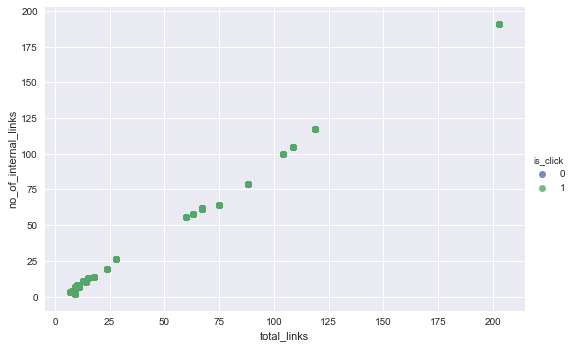

In [13]:
import seaborn as sns
sns.lmplot(data=train_merged, x='total_links', y='no_of_internal_links', hue='is_click', aspect=1.5, ci = None, fit_reg = False)
plt.show();

In [66]:
x = train_merged[feature_cols]
y = train_merged.is_click
x.head()
y.head()

,user_id,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,day_of_week,hour,day,month,IsWeekend
0,14051,42,3,88,79,13,4,0,19,9,1,1
1,134438,52,3,67,62,10,4,5,12,11,2,1
2,181789,33,4,7,3,1,1,0,15,24,7,1
3,231448,44,5,60,56,19,6,1,11,9,5,1
4,185580,29,3,67,61,12,3,5,18,7,1,1


0    0
1    0
2    0
3    0
4    0
Name: is_click, dtype: int64

In [67]:
x.shape
y.shape

(1023191, 12)

(1023191,)

In [68]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
x_resampled, y_resampled = RandomUnderSampler().fit_sample(x, y)
print(sorted(Counter(y_resampled).items()))

[(0, 12782), (1, 12782)]


In [69]:
x_resampled
y_resampled

array([[118936,     34,      3, ...,      8,      1,      0],
       [202475,     30,      5, ...,      7,      5,      0],
       [ 19293,     33,      4, ...,     24,      7,      1],
       ...,
       [103245,     33,      4, ...,     24,      7,      1],
       [ 36187,     49,      0, ...,     28,      9,      1],
       [235406,     33,      4, ...,     26,      7,      1]], dtype=int64)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_res_scaled= pd.DataFrame(columns=feature_cols, data=scaler.fit_transform(x_resampled))
x_res_scaled.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,user_id,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,day_of_week,hour,day,month,IsWeekend
0,-0.025237,-0.931996,0.318755,0.170262,0.052899,0.428125,0.797595,1.295132,1.466416,-0.714180,-1.095639,-1.948627
1,1.177196,-1.379877,1.457391,-1.030205,-1.027297,-0.588445,-0.979699,1.295132,-0.570766,-0.867357,0.233767,-1.948627
2,-1.459466,-1.043966,0.888073,-1.261874,-1.264940,-1.808329,-0.979699,-1.708973,-0.316118,1.736649,0.898469,0.513182
3,1.018132,-1.043966,0.888073,-1.261874,-1.264940,-1.808329,-0.979699,-1.708973,-0.316118,1.736649,0.898469,0.513182
4,-0.131779,1.083465,0.318755,0.001775,0.009692,0.021497,0.797595,0.794447,-1.080062,-0.254650,-0.763287,0.513182


In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res_scaled, y_resampled)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(19173, 12)

(6391, 12)

(19173,)

(6391,)

In [71]:
test_merged[feature_cols].head()

,user_id,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,day_of_week,hour,day,month,IsWeekend
0,122715,63,2,68,64,15,5,1,22,2,1,1
1,76206,56,2,42,38,10,4,3,8,1,2,1
2,96189,57,3,40,36,15,4,1,18,1,5,1
3,166917,56,2,42,38,10,4,3,8,1,2,1
4,172838,56,2,42,38,10,4,3,8,1,2,1


In [92]:
test_scaled = pd.DataFrame(columns=feature_cols, data=scaler.fit_transform(test_merged[feature_cols]))
test_scaled.head()

,user_id,campaign_id,communication_type,total_links,no_of_internal_links,no_of_images,no_of_sections,day_of_week,hour,day,month,IsWeekend
0,0.035784,-0.446438,-0.129635,0.405615,0.448060,0.684008,0.794145,-0.790201,1.331030,-0.436621,-0.987799,0.145226
1,-0.631599,-1.430858,-0.129635,-0.245307,-0.234024,-0.370742,0.099247,0.446796,-1.888278,-0.608705,-0.628489,0.145226
2,-0.344852,-1.290227,1.026943,-0.295378,-0.286492,0.684008,0.099247,-0.790201,0.411228,-0.608705,0.449443,0.145226
3,0.670063,-1.430858,-0.129635,-0.245307,-0.234024,-0.370742,0.099247,0.446796,-1.888278,-0.608705,-0.628489,0.145226
4,0.755027,-1.430858,-0.129635,-0.245307,-0.234024,-0.370742,0.099247,0.446796,-1.888278,-0.608705,-0.628489,0.145226


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
lr = LogisticRegression()
lr_cv_score = cross_val_score(lr, x_train,y_train,cv=10,scoring='roc_auc')
lr_cv_score.mean()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
metrics.roc_auc_score(y_test, lr_pred)

0.562893505883181

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.5340707246958202

In [67]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_cv_score = cross_val_score(dtc, x_train_scaled, y_train, cv=10, scoring='roc_auc')
dtc_cv_score.mean()
dtc.fit(x_train_scaled, y_train)
dtc_pred = dtc.predict(x_test)
metrics.roc_auc_score(y_test, dtc_pred)

0.5939141049919565

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.5

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
rfc = RandomForestClassifier()
rfc_cv_score = cross_val_score(rfc, x_train, y_train, cv=10, scoring='roc_auc')
rfc_cv_score.mean()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
metrics.roc_auc_score(y_test, rfc_pred)

0.5354076156462528

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.5330965362364687

In [82]:
test_pred = lr.predict(test_merged[feature_cols])
test_pred.max()

1

In [83]:
sample['is_click'] = test_pred
sample.head()
sample.to_csv('sample_submission.csv', index=False)

,id,is_click
0,63_122715,0
1,56_76206,0
2,57_96189,1
3,56_166917,0
4,56_172838,0


In [84]:
sample.is_click.value_counts()

1    480163
0    293695
Name: is_click, dtype: int64

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
estimator = np.array([10, 50, 100])
depth = np.array(list(range(11,21)))
#minsample = np.array([3, 5, 7, 10])
#minleaf = np.array([2,3,4,5])
c = ['gini','entropy']
#state = np.array(list(range(25)))
params = {'n_estimators':estimator, 'max_depth':depth, 'criterion':c}
grid = GridSearchCV(rfc, params, scoring='roc_auc', refit=True)
grid.fit(x_train,y_train)
print('Best log_loss: {:.4}, with best{}'.format(grid.best_score_, grid.best_params_))
rfc_pred = grid.predict(x_test)
metrics.roc_auc_score(y_test, rfc_pred)

KeyboardInterrupt: 

In [86]:
test_pred = grid.predict(test_merged[feature_cols])
test_pred.max()

1

In [87]:
sample['is_click'] = test_pred
sample.head()
sample.is_click.value_counts()
sample.to_csv('sample_submission.csv', index=False)

,id,is_click
0,63_122715,1
1,56_76206,1
2,57_96189,1
3,56_166917,1
4,56_172838,1


1    648209
0    125649
Name: is_click, dtype: int64

AV Score - 0.5

In [11]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(kind='borderline2')
x_res, y_res = sm.fit_sample(x_train, y_train)
print (y_train.value_counts(), np.bincount(y_res))

0    757829
1      9564
Name: is_click, dtype: int64 [757829 757828]


In [12]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .3,
                                                    random_state=12)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
rfc = RandomForestClassifier()
rfc_cv_score = cross_val_score(rfc, x_train_res, y_train_res, cv=10, scoring='roc_auc')
rfc_cv_score.mean()
rfc.fit(x_train_res, y_train_res)
rfc_pred = rfc.predict(x_val_res)
metrics.roc_auc_score(y_val_res, rfc_pred)

0.9608199132703905

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9385781070166691

In [14]:
rfc_pred = rfc.predict(x_test)
metrics.roc_auc_score(y_test, rfc_pred)

0.4993158817288984

In [15]:
test_pred = rfc.predict(test_scaled)
test_pred.max()

1

In [16]:
sample['is_click'] = test_pred
sample.head()
sample.to_csv('sample_submission.csv', index=False)

,id,is_click
0,63_122715,0
1,56_76206,1
2,57_96189,1
3,56_166917,1
4,56_172838,1


In [17]:
sample.is_click.value_counts()

0    439211
1    334647
Name: is_click, dtype: int64

AV Score - 0.5036686451

In [37]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_cv_score = cross_val_score(logreg, x_train_res, y_train_res, cv=10, scoring='roc_auc')
logreg_cv_score.mean()
logreg.fit(x_train_res,y_train_res)
logreg_pred = logreg.predict(x_val_res)
metrics.roc_auc_score(y_val_res, logreg_pred)

0.576930773482681

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.5488010519722455

In [38]:
logreg_pred = logreg.predict(x_test)
metrics.roc_auc_score(y_test, logreg_pred)

0.5490153301415281

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc_cv_score = cross_val_score(dtc, x_train_res, y_train_res, cv=10, scoring='roc_auc')
dtc_cv_score.mean()
dtc.fit(x_train_res,y_train_res)
dtc_pred = dtc.predict(x_val_res)
metrics.roc_auc_score(y_val_res, dtc_pred)
dtc_pred = dtc.predict(x_test)
metrics.roc_auc_score(y_test, dtc_pred)

0.5952868121815671

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.5602902431140212

0.5595831004861319

Note: DecisionTreeClassifier score is same as RandomForestClassifier. We can improve RandomForestClassifier further by parameter tuning.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train_res,y_train_res)
knc_pred = knc.predict(x_val_res)
metrics.roc_auc_score(y_val_res, knc_pred)
knc_pred = knc.predict(x_test)
metrics.roc_auc_score(y_test, knc_pred)

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5, max_features=0.5)
bagging.fit(x_train_res,y_train_res)
bagging_pred = bagging.predict(x_val_res)
metrics.roc_auc_score(y_val_res, bagging_pred)
bagging_pred = bagging.predict(x_test)
metrics.roc_auc_score(y_test, bagging_pred)

0.563722563161521

0.5571903371628049

In [16]:
test_pred = bagging.predict(test_scaled)
test_pred.max()

1

In [19]:
sample['is_click'] = test_pred
sample.head()
sample.to_csv('sample_submission.csv', index=False)

,id,is_click
0,63_122715,1
1,56_76206,0
2,57_96189,1
3,56_166917,0
4,56_172838,0


AV Score - 0.512834291584243

In [22]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc = AdaBoostClassifier()
abc.fit(x_train_res,y_train_res)
abc_pred = abc.predict(x_val_res)
metrics.roc_auc_score(y_val_res, abc_pred)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

0.5591909307138037

In [23]:
abc_pred = abc.predict(x_test)
metrics.roc_auc_score(y_test, abc_pred)

0.5554747946390631

In [26]:
test_pred = abc.predict(test_scaled)
test_pred.max()

1

In [27]:
sample['is_click'] = test_pred
sample.head()
sample.to_csv('sample_submission.csv', index=False)

,id,is_click
0,63_122715,0
1,56_76206,0
2,57_96189,0
3,56_166917,0
4,56_172838,0


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_res,y_train_res)
gbcpred = gbc.predict(x_val_res)
metrics.roc_auc_score(y_val_res, gbcpred)
gbcpred = gbc.predict(x_test)
metrics.roc_auc_score(y_test, gbcpred)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

0.5634607569935224

0.55640387885832

In [29]:
test_pred = gbc.predict(test_scaled)
test_pred.max()

1

In [30]:
sample['is_click'] = test_pred
sample.head()
sample.to_csv('sample_submission.csv', index=False)

,id,is_click
0,63_122715,0
1,56_76206,1
2,57_96189,0
3,56_166917,1
4,56_172838,1


In [41]:
import xgboost
#from sklearn.grid_search import GridSearchCV

XGBoostLibraryNotFound: Cannot find XGBoost Library in the candidate path, did you install compilers and run build.sh in root path?
List of candidates:
C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.7-py3.6.egg\xgboost\xgboost.dll
C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.7-py3.6.egg\xgboost\../../lib/xgboost.dll
C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.7-py3.6.egg\xgboost\./lib/xgboost.dll
C:\ProgramData\Anaconda3\xgboost\xgboost.dll
C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.7-py3.6.egg\xgboost\../../windows/x64/Release/xgboost.dll
C:\ProgramData\Anaconda3\lib\site-packages\xgboost-0.7-py3.6.egg\xgboost\./windows/x64/Release/xgboost.dll

In [ ]:
from imblearn.under_sampling import AllKNN
allknn = AllKNN()
x_res, y_res = allknn.fit_sample(x_train, y_train)
print(sorted(Counter(y_res).items()))